# EJERCICIOS

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.datasets import mnist
import os
import matplotlib.pyplot as plt
import tensorflow_hub as hub
from tensorflow.keras.utils import to_categorical
from keras import Sequential
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Concatenate, Conv2D, MaxPooling2D,Dropout,GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import ResNet50

2025-01-28 19:34:18.075548: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-28 19:34:18.084577: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738089258.094049   63689 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738089258.096926   63689 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-28 19:34:18.107190: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

## EJERCICIO 1

Crea tu propia CNN desde el principio e intenta conseguir la mayor exactitud posible con MNIST (por ejemplo 99% en el conjunto de prueba).

En vez de crear un conjunto de validación en el fit indica que porcentaje (10%) vas a usar para el conjunto de validación (validation_split)

Por ejemplo:
* 2 capas convolucionales (32 filtros)
* 1 capa maxpool
* 2 capas convolucionales (64 filtros)
* 1 capa maxpool
* 1 capa flatten
* 1 capa dropout
* 1 capa densa oculta
* 1 capa dropout
* 1 capa densa de salida

Usá como función de pérdida categorical_crossentropy.

Ten en cuenta que:
* sparse_categorical_crossentropy: se usa cuando las etiquetas de las clases están representadas como enteros (codificación entera), por ejemplo: 0, 1, 2, 3, ... para n clasess
* categorical_crossentropy: se usa cuando las etiquetas están representadas en formato one-hot encoded.

Tal y com tenemos los datos podemos usar directamente sparse_categorical_crossentropy, para poder aplicar categorical_crossentropy hay que hacer una transformación en y (to_categorical).

Haz una predicción y muestra la imagen con la etiqueta real y la predicha.

Epoch 1/20
422/422 - 5s - 13ms/step - accuracy: 0.8870 - loss: 0.3527 - val_accuracy: 0.9845 - val_loss: 0.0522
Epoch 2/20
422/422 - 1s - 3ms/step - accuracy: 0.9678 - loss: 0.1072 - val_accuracy: 0.9913 - val_loss: 0.0319
Epoch 3/20
422/422 - 1s - 3ms/step - accuracy: 0.9778 - loss: 0.0738 - val_accuracy: 0.9913 - val_loss: 0.0293
Epoch 4/20
422/422 - 1s - 3ms/step - accuracy: 0.9814 - loss: 0.0625 - val_accuracy: 0.9915 - val_loss: 0.0296
Epoch 5/20
422/422 - 1s - 3ms/step - accuracy: 0.9846 - loss: 0.0537 - val_accuracy: 0.9918 - val_loss: 0.0284
Epoch 6/20
422/422 - 1s - 3ms/step - accuracy: 0.9862 - loss: 0.0479 - val_accuracy: 0.9935 - val_loss: 0.0268
Epoch 7/20
422/422 - 1s - 2ms/step - accuracy: 0.9861 - loss: 0.0443 - val_accuracy: 0.9925 - val_loss: 0.0288
Epoch 8/20
422/422 - 1s - 2ms/step - accuracy: 0.9881 - loss: 0.0397 - val_accuracy: 0.9937 - val_loss: 0.0231
Epoch 9/20
422/422 - 1s - 3ms/step - accuracy: 0.9895 - loss: 0.0361 - val_accuracy: 0.9930 - val_loss: 0.0275


2025-01-27 19:31:38.554437: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_86', 4 bytes spill stores, 4 bytes spill loads



Exactitud en el conjunto de prueba: 99.49%


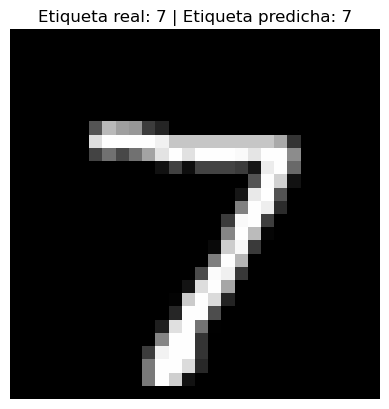

In [ ]:
# Carga de datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocesamiento de datos
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

# Si quisiéramos usar categorical_crossentropy, usamos to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Creación del modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dropout(0.5), 
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax') #Salida
])

# Compilación del modelo
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',  # Usamos sparse por las etiquetas enteras
              metrics=['accuracy'])

# Entrenamiento
history = model.fit(x_train, y_train, epochs=20, batch_size=128, 
                    validation_split=0.1, verbose=2)

# Evaluación en el conjunto de prueba
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Exactitud en el conjunto de prueba: {test_acc * 100:.2f}%")

# Predicción y visualización de resultados
def plot_prediction(index):
    image = x_test[index].reshape(28, 28)
    true_label = y_test[index]
    pred_label = np.argmax(model.predict(x_test[index:index+1], verbose=0))

    plt.imshow(image, cmap='gray')
    plt.title(f"Etiqueta real: {true_label} | Etiqueta predicha: {pred_label}")
    plt.axis('off')
    plt.show()

# Ejemplo: visualización de una predicción
plot_prediction(0)

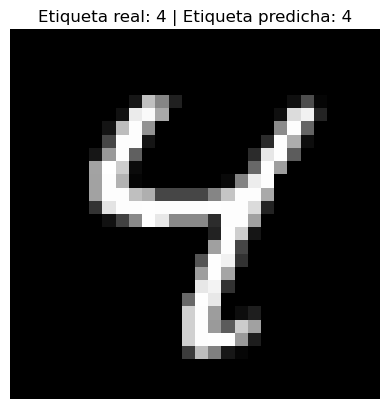

In [11]:
plot_prediction(6)

## EJERCICIO 2

Haz unas fotos con tu movil (a objetos) y usando alguno de los modelos que existen (por ejemplo ResNet101V2). Tendrás de adecuar el tamaño de las fotos antes de intentar predecir que es lo que has fotografiado.

Tendrás que investigar como añadir cargar tus images, un buen sitio por donde empezar es por la documentación de Keras para ResNEt101V2.

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Foto: raton.jpg
 - mousetrap: 37.15%
 - hamster: 34.14%
 - fox_squirrel: 23.71%


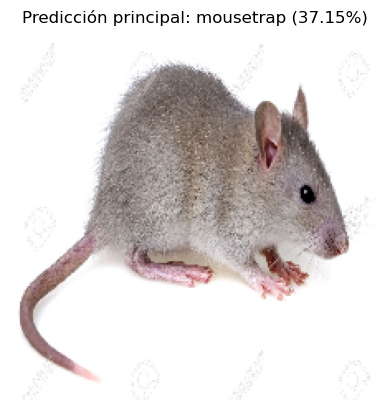

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Foto: perro.webp
 - golden_retriever: 98.69%
 - Great_Pyrenees: 0.96%
 - Labrador_retriever: 0.28%


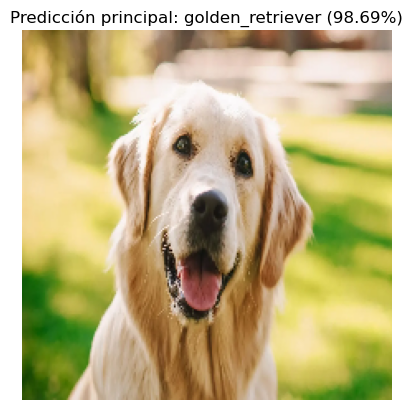

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Foto: bisturi.jpeg
 - letter_opener: 70.47%
 - corkscrew: 12.00%
 - scabbard: 9.89%


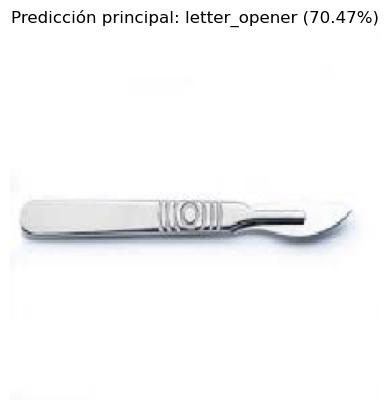

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Foto: maserati.jpeg
 - sports_car: 99.73%
 - racer: 0.23%
 - car_wheel: 0.03%


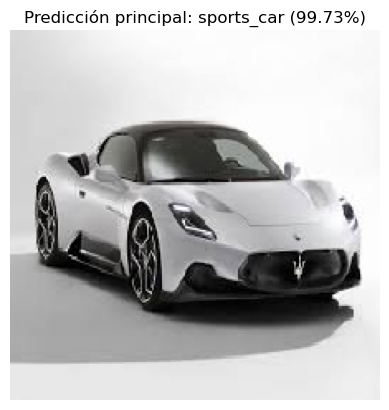

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Foto: bicicleta.jpeg
 - mountain_bike: 99.56%
 - tricycle: 0.22%
 - bicycle-built-for-two: 0.18%


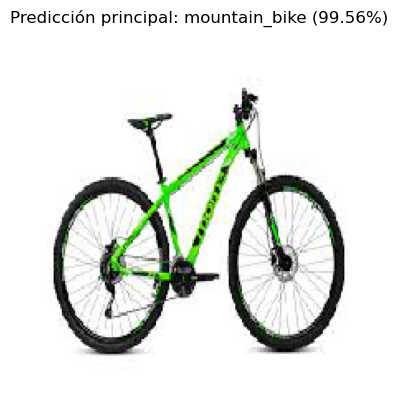

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Foto: cascos.jpg
 - hair_slide: 98.11%
 - chain: 0.70%
 - knot: 0.28%


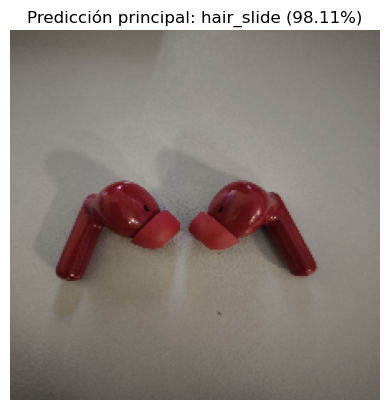

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Foto: papelera.jpg
 - ashcan: 77.77%
 - folding_chair: 12.89%
 - desk: 1.78%


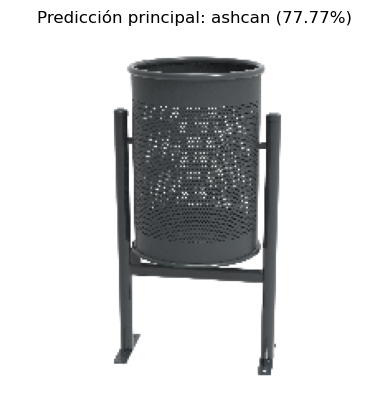

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Foto: kiwi.jpeg
 - Granny_Smith: 78.29%
 - banana: 7.33%
 - custard_apple: 3.84%


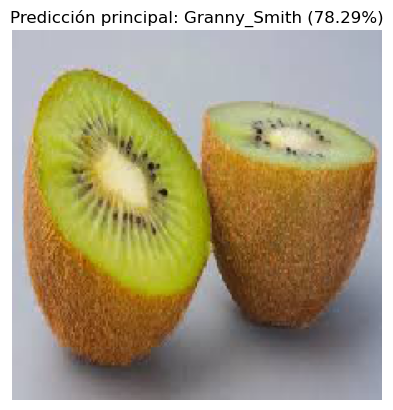

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Foto: aguacates.jpg
 - buckeye: 65.83%
 - hotdog: 29.67%
 - acorn: 1.60%


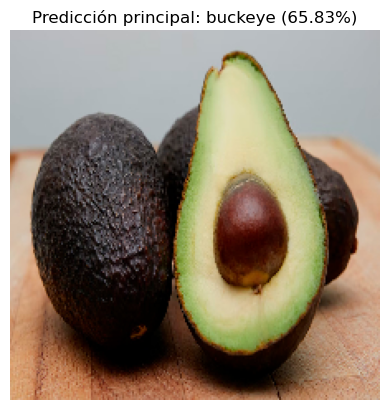

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Foto: nave_espacial.jpg
 - space_shuttle: 99.71%
 - missile: 0.16%
 - projectile: 0.13%


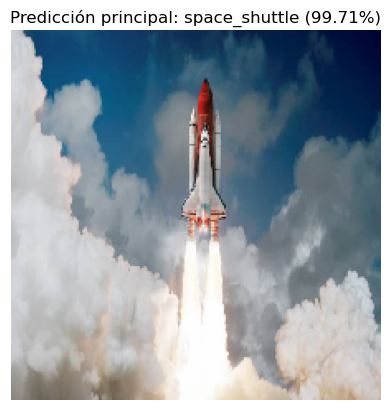

In [8]:
ruta_fotos = "fotos"  # Cambia esto por la ruta donde están tus imágenes
fotos = os.listdir(ruta_fotos)

# Carga del modelo preentrenado
modelo = ResNet101V2(weights="imagenet")

# Procesar y predecir cada imagen
for foto in fotos:
    # Cargar la imagen
    ruta_foto = os.path.join(ruta_fotos, foto)
    img = load_img(ruta_foto, target_size=(224, 224))  # Redimensionar la imagen a 224x224
    img_array = img_to_array(img)  # Convertir a array
    img_array = np.expand_dims(img_array, axis=0)  # Añadir dimensión para batch
    img_array = preprocess_input(img_array)  # Preprocesar para ResNet
    
    # Hacer predicción
    predicciones = modelo.predict(img_array)
    etiquetas = decode_predictions(predicciones, top=3)[0]  # Decodificar las 3 mejores predicciones

    # Mostrar resultados
    print(f"Foto: {foto}")
    for etiqueta in etiquetas:
        print(f" - {etiqueta[1]}: {etiqueta[2]*100:.2f}%")
    
    # Mostrar la imagen
    plt.imshow(img)
    plt.title(f"Predicción principal: {etiquetas[0][1]} ({etiquetas[0][2]*100:.2f}%)")
    plt.axis("off")
    plt.show()

## EJERCICIO 3

El dataset food101 es un conjunto de datos consta de 101 categorías de alimentos, con 101000 imágenes. Para cada clase, se proporcionan 250 imágenes de prueba revisadas manualmente, así como 750 imágenes de entrenamiento. A propósito, las imágenes de entrenamiento no se limpiaron y, por lo tanto, aún contienen cierta cantidad de ruido. Esto viene principalmente en forma de colores intensos y, a veces, etiquetas incorrectas. Todas las imágenes se redimensionaron para tener una longitud lateral máxima de 512 píxeles.
* Carga el conjunto de imagenes: entrenamiento, validación (coge la mitad de los datos de prueba) y prueba (coge la otra mitad de los datos de prueba)
* Explora los datos: dimensiones, número de elementos, dibuja algunas imagenes con sus etiquetas...
* Prepara los datos: añade más elementos al conjunto de entrenamiento (rotando, trasladando... las imagenes acutales), cambia el tamaño para que sea adecuado para el modelo, normaliza...
* Entrena un modelo para estos datos usando algunas de las redes ya existentes (por ejemplo: MobileNetV2): coge todo menos la última capa y añade una capa globalaveragepooling y la capa dense de salida. En este caso utiliza como función de pérdida sparse_categorical_crossentropy
* Busca una imagen de comida en Internet y haz una predicción

Por defecto tensorflow busca y descarga los dato en:
* Linux/Mac: ~/tensorflow_datasets/
* Windows: C:\Users\<usuario>\tensorflow_datasets\

Los datos puedes copiarlo de mi disco duro o descarlos, pero son 5.12GB

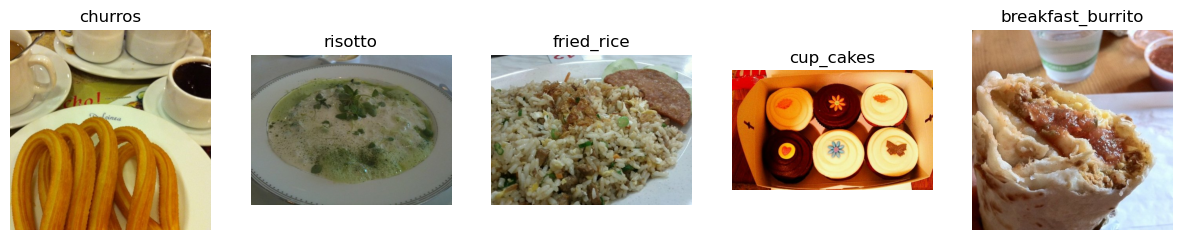

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 101)            │       129,381 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,387,365 (9.11 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 332s 139ms/step - accuracy: 0.3801 - loss: 2.6182 - val_accuracy: 0.5944 - val_loss: 1.5499
Epoch 2/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 339s 143ms/step - accuracy: 0.5562 - loss: 1.7488 - val_accuracy: 0.6098 - val_loss: 1.4802
Epoch 3/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 336s 142ms/step - accuracy: 0.5835 - loss: 1.6202 - val_accuracy: 0.6132 - val_loss: 1.4645
Epoch 4/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 321s 136ms/step - accuracy: 0.6029 - loss: 1.5475 - val_accuracy: 0.6254 - val_loss: 1.4393
Epoch 5/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 302s 128ms/step - accuracy: 0.6111 - loss: 1.5026 - val_accuracy: 0.6167 - val_loss: 1.4656
Epoch 6/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 307s 130ms/step - accuracy: 0.6202 - loss: 1.4354 - val_accuracy: 0.6247 - val_loss: 1.4613
Epoch 7/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 305s 129ms/step - accuracy: 0.6285 - loss: 1.4044 - val_accuracy: 0.6167 - val_loss: 1.4817
Epoch 8/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 303s 128ms/step - ac

In [6]:
#CARGAR DATOS
data_dir = "/home/iabd/Documentos/tensorflow_datasets"

# Cargar el dataset food101
(ds_train, ds_validation, ds_test), ds_info = tfds.load(
    'food101',
    split=['train', 'validation[:50%]', 'validation[50%:]'],
    shuffle_files=True,
    data_dir=data_dir,
    with_info=True,
    as_supervised=True
)

#EXPLORAR DATOS

# Función para mostrar imágenes
def show_images(dataset, num_images=5):
    plt.figure(figsize=(15, 15))
    for i, (image, label) in enumerate(dataset.take(num_images)):
        plt.subplot(1, num_images, i+1)
        plt.imshow(image)
        plt.title(ds_info.features['label'].int2str(label))
        plt.axis('off')
    plt.show()

# Mostrar algunas imágenes del conjunto de entrenamiento
show_images(ds_train)

#PROCESAR DATOS

# Tamaño deseado para las imágenes
IMG_SIZE = 224

# Función para redimensionar y normalizar las imágenes
def preprocess_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
    return image, label

# Función para aumentar los datos
def augment_image(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.5, upper=1.5)
    image = tf.image.random_saturation(image, lower=0.5, upper=1.5)
    return image, label

# Aplicar las transformaciones a los conjuntos de datos
ds_train = ds_train.map(augment_image).map(preprocess_image).batch(32).prefetch(tf.data.AUTOTUNE)
ds_validation = ds_validation.map(preprocess_image).batch(32).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess_image).batch(32).prefetch(tf.data.AUTOTUNE)

# Cargar MobileNetV2 sin la última capa y con pesos preentrenados en ImageNet
base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')

# Congelar el modelo base para no entrenar sus pesos
base_model.trainable = False

# CONSTRUIT MODELO
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(101, activation='softmax')  # 101 clases en food101
])

# COMPILAR MODELO
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()
 
# ENTRENAMIENTO
history = model.fit(
    ds_train,
    validation_data=ds_validation,
    epochs=10
)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(ds_test)
print(f"Precisión en el conjunto de prueba: {test_acc}")

E0000 00:00:1738085458.433695   38364 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1738085458.542100   38364 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
La clase predicha es: hot_dog


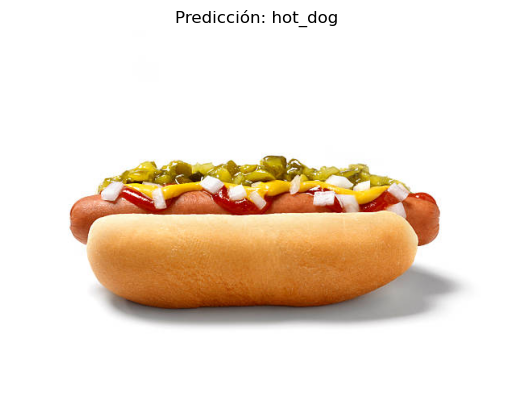

In [7]:
# Ruta de la imagen externa
image_path = "fotos/perrito_caliente.jpg"

# Tamaño de la imagen definido en el modelo
IMG_SIZE = 224

# Preprocesar la imagen externa
image = load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))  # Cargar y redimensionar
image_array = img_to_array(image)  # Convertir la imagen a un array numpy
image_array = tf.expand_dims(image_array, axis=0)  # Añadir dimensión batch
image_array = tf.keras.applications.mobilenet_v2.preprocess_input(image_array)  # Normalizar

# Realizar predicción
predictions = model.predict(image_array)
predicted_class_index = np.argmax(predictions)  # Índice de la clase predicha
predicted_class = ds_info.features['label'].int2str(predicted_class_index)  # Nombre de la clase

# Imprimir la clase predicha
print(f"La clase predicha es: {predicted_class}")

# Mostrar la imagen con la predicción
plt.imshow(load_img(image_path))  # Mostrar la imagen original
plt.title(f"Predicción: {predicted_class}")
plt.axis("off")
plt.show()


## EJERCICIO 4

Repite el ejercicio pero para otros datos (tienes conjuntos de datos en https://www.tensorflow.org/datasets/catalog/overview?hl=es-419 en el apartado image classificación, por ejemplo puedes usar stanford_dogs) y utilizando otra de las redes conocidas que no se haya utilizado todavía.
Para cargar los datos en este caso vas a descargar las imagnes a tu ordenador y cargarlos desde ahi (descargar la carpeta al ordenador y luego cargarlo desde la carpeta con python (mage_dataset_from_director)):

* Carga el conjunto de imagenes (entrenamiento, validación y pruebas)
* Explora los datos: dimensiones, número de elementos, dibuja algunas imagenes con sus etiquetas...
* Prepara los datos: añadir más elementos al conjunto de entrenamiento (rotando, trasladando... las imagenes acutales), cambiar el tamaño para que sea adecuado para el modelo, normalizar...
* Entrena un modelo para estos datos usando algunas de las redes ya existentes (por ejemplo: MobileNetV2)
* Busa una imagen en Internet y haz una predicción

In [31]:
#CARGAR DATOS
data_dir = "/home/iabd/Documentos/tensorflow_datasets"
# Cargar el dataset Stanford Dogs
(ds_train, ds_validation, ds_test), ds_info = tfds.load(
    'stanford_dogs',
    split=['train[:80%]', 'train[80%:]', 'test'],
    shuffle_files=True,
    data_dir=data_dir,
    with_info=True,
    as_supervised=True  # Carga (imagen, etiqueta)
)

In [27]:
# PREPARAR LOS DATOS
IMG_SIZE = 224
BATCH_SIZE = 32

# Directorio donde están las imágenes descargadas
data_dir = "/home/iabd/Documentos/tensorflow_datasets/perros/"

# Cargar datos desde el directorio
ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    image_size=(IMG_SIZE, IMG_SIZE),  # Redimensionar las imágenes
    batch_size=32,
    label_mode='int',  # Etiquetas como enteros
    validation_split=0.2,  # 20% para validación
    subset='training',  # Datos de entrenamiento
    seed=123  # Semilla para reproducibilidad
)

# Cargar datos de validación desde el directorio (para el 20% restante)
ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    image_size=(IMG_SIZE, IMG_SIZE),  # Redimensionar las imágenes
    batch_size=32,
    label_mode='int',  # Etiquetas como enteros
    validation_split=0.2,  # 20% para validación
    subset='validation',  # Datos de validación
    seed=123  # Semilla para reproducibilidad
)

# Información sobre los datos cargados
class_names = ds.class_names
print(f"Clases de perros: {class_names}")

# Preprocesamiento de los datos para mejorar el rendimiento de carga
AUTOTUNE = tf.data.AUTOTUNE
ds = ds.cache().prefetch(buffer_size=AUTOTUNE)
ds_validation = ds_validation.cache().prefetch(buffer_size=AUTOTUNE)

Found 41160 files belonging to 120 classes.
Using 32928 files for training.
Found 41160 files belonging to 120 classes.
Using 8232 files for validation.
Clases de perros: ['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrie

In [30]:
# Exploración de los datos:
# 1. Dimensiones de las imágenes y tamaños de los lotes (batches)
print(f"Dimensiones de las imágenes: {ds.element_spec[0].shape}")
print(f"Cantidad de batches en el conjunto de entrenamiento: {len(ds)}")
print(f"Cantidad de batches en el conjunto de validación: {len(ds_validation)}")

# Mostrar algunas imágenes con sus etiquetas
def show_images(dataset, num_images=9):
    plt.figure(figsize=(10, 10))
    for i, (images, labels) in enumerate(dataset.take(1)):  # Tomar un batch de imágenes
        for j in range(min(num_images, len(images))):
            plt.subplot(3, 3, j + 1)
            plt.imshow(images[j].numpy().astype("uint8"))
            plt.title(class_names[labels[j]])  # Mostrar la etiqueta (nombre de la clase)
            plt.axis("off")
    plt.show()

# Mostrar algunas imágenes con sus etiquetas
show_images(ds)

Dimensiones de las imágenes: (None, 224, 224, 3)
Cantidad de batches en el conjunto de entrenamiento: 1029
Cantidad de batches en el conjunto de validación: 2400


InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]] [Op:IteratorGetNext] name: 

<Figure size 1000x1000 with 0 Axes>

Número de clases: 120
Clases: ['n02085620-chihuahua', 'n02085782-japanese_spaniel', 'n02085936-maltese_dog', 'n02086079-pekinese', 'n02086240-shih-tzu', 'n02086646-blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-rhodesian_ridgeback', 'n02088094-afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-walker_hound', 'n02089973-english_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-irish_wolfhound', 'n02091032-italian_greyhound', 'n02091134-whippet', 'n02091244-ibizan_hound', 'n02091467-norwegian_elkhound', 'n02091635-otterhound', 'n02091831-saluki', 'n02092002-scottish_deerhound', 'n02092339-weimaraner', 'n02093256-staffordshire_bullterrier', 'n02093428-american_staffordshire_terrier', 'n02093647-bedlington_terrier', 'n02093754-border_terrier', 'n02093859-kerry_blue_terrier', 'n02093991-irish_terrier', 'n02094114-norfolk_terrier', 'n02094258-norwich_te

2025-01-28 20:23:26.378670: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:376] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608


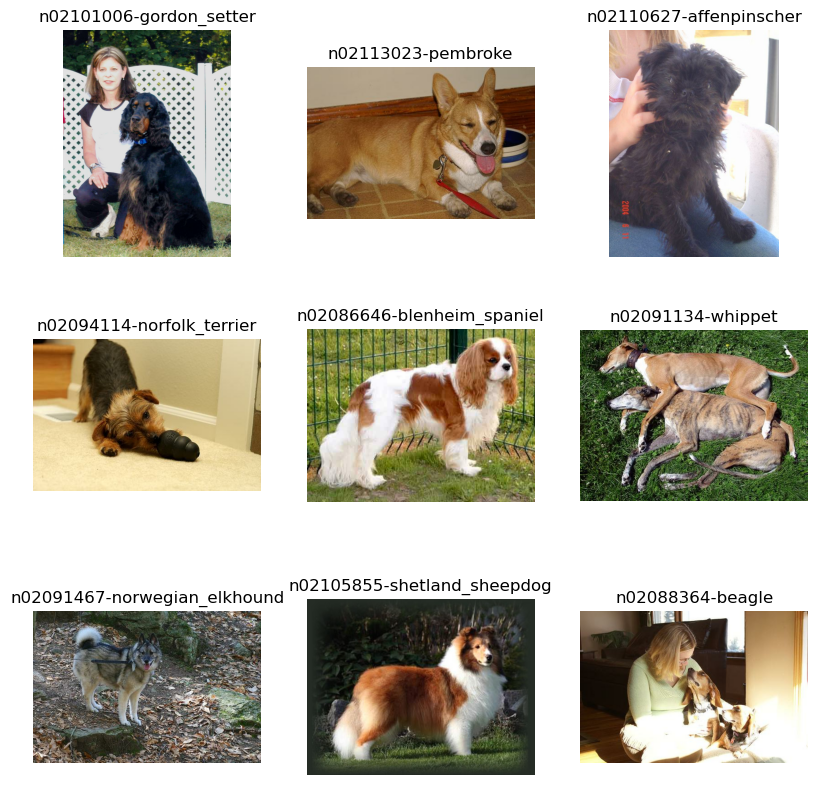

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │       245,880 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,833,592 (90.92 MB)

 Trainable params: 245,880 (960.47 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/10


I0000 00:00:1738092212.124368   63797 service.cc:148] XLA service 0x778c30001ae0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738092212.124389   63797 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 Laptop GPU, Compute Capability 8.9
2025-01-28 20:23:32.261593: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1738092212.981112   63797 cuda_dnn.cc:529] Loaded cuDNN version 90600


  3/300 ━━━━━━━━━━━━━━━━━━━━ 18s 63ms/step - accuracy: 0.0260 - loss: 6.2326

I0000 00:00:1738092217.524712   63797 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.2353 - loss: 3.7846

2025-01-28 20:23:57.816967: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1696', 204 bytes spill stores, 204 bytes spill loads



300/300 ━━━━━━━━━━━━━━━━━━━━ 35s 85ms/step - accuracy: 0.2358 - loss: 3.7807 - val_accuracy: 0.6983 - val_loss: 1.0230
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - accuracy: 0.6624 - loss: 1.1883 - val_accuracy: 0.7271 - val_loss: 0.9076
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 23s 78ms/step - accuracy: 0.7323 - loss: 0.9117 - val_accuracy: 0.7417 - val_loss: 0.8714
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 24s 79ms/step - accuracy: 0.7668 - loss: 0.7615 - val_accuracy: 0.7483 - val_loss: 0.8612
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 25s 82ms/step - accuracy: 0.7934 - loss: 0.6534 - val_accuracy: 0.7496 - val_loss: 0.8716
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 25s 84ms/step - accuracy: 0.8069 - loss: 0.6149 - val_accuracy: 0.7462 - val_loss: 0.8857
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 25s 83ms/step - accuracy: 0.8254 - loss: 0.5651 - val_accuracy: 0.7487 - val_loss: 0.9203
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 25s 84ms/step - accuracy: 0.8268 - loss: 0.5409 - val_accurac

In [32]:


# Explorar los datos
class_names = ds_info.features['label'].names
print(f"Número de clases: {len(class_names)}")
print(f"Clases: {class_names}")

# Mostrar algunas imágenes con etiquetas
def show_images(dataset, num_images=9):
    plt.figure(figsize=(10, 10))
    for i, (images, labels) in enumerate(dataset.take(num_images)):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images.numpy().astype("uint8"))
        plt.title(class_names[labels])
        plt.axis("off")
    plt.show()

show_images(ds_train)

# PREPARAR LOS DATOS
IMG_SIZE = 224
BATCH_SIZE = 32

# Función de preprocesamiento
def preprocess_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.keras.applications.resnet.preprocess_input(image)
    return image, label

# Función para aumentar los datos
def augment_image(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.5, upper=1.5)
    return image, label

# Aplicar preprocesamiento y aumentación
ds_train = (
    ds_train.map(augment_image)
    .map(preprocess_image)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

ds_validation = (
    ds_validation.map(preprocess_image)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

ds_test = (
    ds_test.map(preprocess_image)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

# CREAR EL MODELO USANDO ResNet50
base_model = ResNet50(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights="imagenet")
base_model.trainable = False  # Congelar capas preentrenadas

# Modelo completo
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(len(class_names), activation="softmax")  # Clases del dataset
])

# Compilar el modelo
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Resumen del modelo
model.summary()

# ENTRENAR EL MODELO
history = model.fit(
    ds_train,
    validation_data=ds_validation,
    epochs=10  # Ajusta según los recursos
)

# EVALUAR EL MODELO
test_loss, test_acc = model.evaluate(ds_test)
print(f"Pérdida en el conjunto de prueba: {test_loss:.4f}")
print(f"Precisión en el conjunto de prueba: {test_acc:.4f}")



In [37]:
# HACER UNA PREDICCIÓN CON UNA IMAGEN DE INTERNET

# Cargar una imagen desde Internet
image_path = "fotos/corgi.jpeg"  # Ruta de la imagen
image = load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
image_array = img_to_array(image)
image_array = tf.expand_dims(image_array, axis=0)  # Añadir dimensión batch
image_array = tf.keras.applications.resnet.preprocess_input(image_array)

# Predicción
predictions = model.predict(image_array)
predicted_class = class_names[np.argmax(predictions)]
print(f"La clase predicha es: {predicted_class}")

# Mostrar la imagen
plt.imshow(image)
plt.title(f"Predicción: {predicted_class}")
plt.axis("off")
plt.show()

TypeError: load_img() got an unexpected keyword argument 'target_size'

## EJERCICIO 5

Sigue el tutorial de TensorFlow Style Transfer (https://homl.info/styletuto) hasta definir representaciones de contenido y estilo (hay que hacer sólo los primeros puntos, hasta el punto  Transferencia de estilo rápido usando TF-Hub (incluido)).

Haz algo parecido no igual (por lo menos cambia de imagenes).

Además tienes que poner comentarios para explicar con tus palabras lo que estas haciendo.

Realmente lo que esta haciendo es aplicar una capas convolucionales a una imagen, donde los filtros se han sacado de otra imagen.

In [13]:
import tensorflow as tf
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRE'

import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)


In [21]:
content_path = tf.keras.utils.get_file('raza-perro-pastor-de-los-pirineos.jpg', 'https://www.perrosamigos.com/Uploads/perrosamigos.com/ImagenesGrandes/raza-perro-pastor-de-los-pirineos.jpg')
style_path = tf.keras.utils.get_file('buntes-Graffiti.jpg','https://www.kunstloft.de/wordpress/de_DE/de/wp-content/uploads/2023/05/buntes-Graffiti.jpg')

807732/807732 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


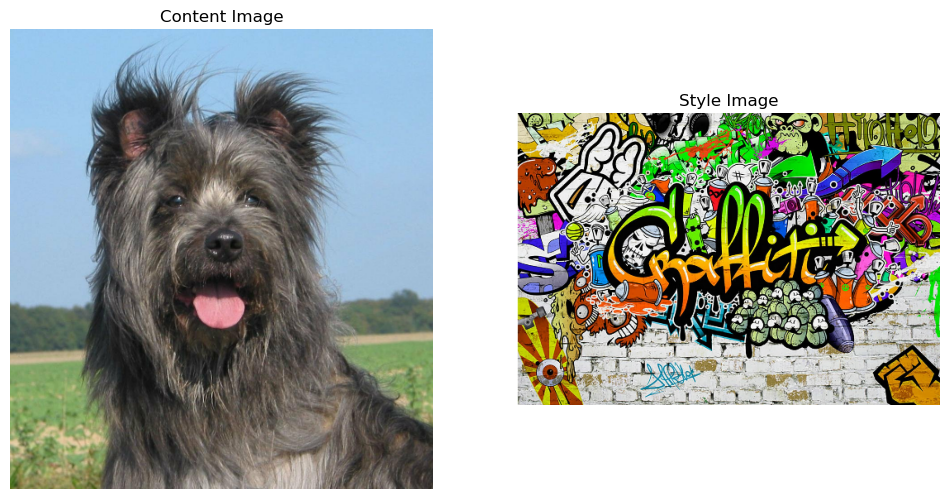

In [22]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

def imshow(image, title):
    # Remove batch dimension
    image = tensor_to_image(image)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')  # Optional: Turn off axes


content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

## EJERCICIO 6

Crea un modelo sencillo que aplique un filtro personalizado a una imagen de contenido mediante una capa convolucional es un buen ejercicio para entender cómo funcionan las convoluciones en el procesamiento de imágenes.

Carga una imagen desde archivo preparala para se procesada por la red:
* Cargar la imagen (tf.keras.preprocessing.image.load_im)
* Convertir la imagen a un tensor de NumPy y redimensionarla:
    * tf.keras.preprocessing.image.img_to_array
    * tf.image.resize
* Añadir una dimensión de batch al tensor de la imagen (np.expand_dims)


Define un filtro personalizado para aplicar a la imagen. Los filtros son matrices pequeñas que modifican los píxeles de la imagen al aplicar la convolución.

Por ejemplo aquí tienes un filtro de bordes:

```python
filtro = np.array([
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]
], dtype=np.float32)
```
El filtro debe tener forma (altura, anchura, canales_entrada, canales_salida) (usa reshape)

Crea un modelo secuencial en Keras con una única capa convolucional que utilice tu filtro personalizado.

Visualiza el resultado (muestra la imagen original y la imagen con el filtro y pon un título a cada imagen)

## EJERCICIO 7
Repite el ejercicio anterior con diferentes modelos y filtros:
* Prueba otro filtro (mostrar imagen original e imagen con filtro)
* Prueba con tres filtros a la vez (mostrar la imagen resultante de cada filtro)
* Prueba con tres filtros y dos capas convolucionales (mostrar imagen original e imagne con filtro)